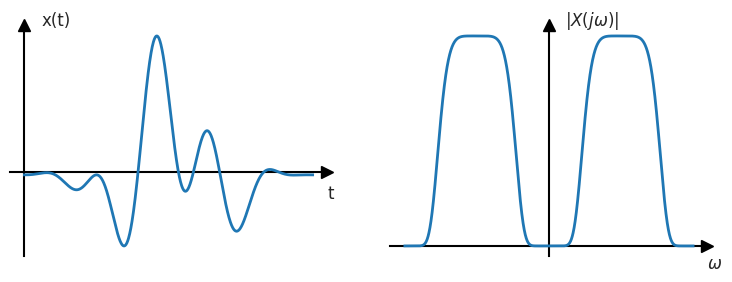

In [2]:
import matplotlib.pyplot as plt
import helpers
import numpy as np
import os, sys

sys.path.append(os.path.abspath('./comm'))
import skcomm as skc

plt.style.use('noelle.mplstyle')

sr = 1e3
t = skc.utils.create_time_axis(sample_rate=sr, n_samples=sr)
sig = helpers.gen_generic_time_signal(sr=sr, T=1)
spec = helpers.gen_generic_freq_signal(n=len(t))

# plotting
n_row = 1
n_col = 2
fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
fig, axs = plt.subplots(figsize=fig_size, nrows=n_row, ncols=n_col)

axs[0].plot(t,sig,lw=2)
helpers.plot_as_arrows(axs[0], xlabel=('t',1,0.25), ylabel=('x(t)',0.1,1))

spec = np.concatenate((spec,spec))
f = np.fft.fftshift(np.fft.fftfreq(n=spec.size,d=1/sr))
axs[1].plot(f, spec,lw=2)
helpers.plot_as_arrows(axs[1], xlabel=('$\omega$',1.0,-0.05), ylabel=('$|X(j\omega)|$',0.55,1))
plt.show()